In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import Holt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Read Data**

In [3]:
url = 'https://raw.githubusercontent.com/cs575ts/Assignments/main/Assignment_2/D3.csv'

dataframe = pd.read_csv(url)

In [4]:
dataframe.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


Seasonality index is already done in single exponential on D3 dataset file.

**Single Exponential Smoothing without inbuilt function**

In [5]:
alpha_array = [0.5,0.7,0.9]
gamma_array = [0.06,0.03,0.01]

**Function for double exponential smoothing**

In [6]:
def dataset_with_interval(dataset):
  s1 = dataset[0]
  b1 = (dataset[-1] - dataset[0])/(len(dataset)-1)
  forecasted_list=[]
  mse_list = []
  complete_fc_val_list=[]
  for alpha in alpha_array:
    for gamma in gamma_array:
      s = [s1]
      b = [b1]
      f = []
      for i in range(len(dataset)):
        if (i<(len(dataset)-1)):
          st = alpha*(dataset[i+1]) + ((1-alpha)*(s[i]+b[i]))
          s.append(st)       
          bt = gamma*(s[i+1]-s[i]) + (1-gamma)*b[i] 
          b.append(bt)   
          ft = st+bt
          f.append(ft)

      f.insert(0,s1)
      fc_s = f.copy()
      forecasted_list.append(f[-1])
      complete_fc_val_list.append(fc_s)

      cp_df = dataset.copy()
      cp_df = np.c_[ cp_df, f ] 
      error_array = cp_df[:,0] - cp_df[:,1]
      cp_df = np.c_[ cp_df, error_array ]
      sqer_arr = (cp_df[:,2])**2
      cp_df = np.c_[cp_df,sqer_arr]

      MSE = np.sum(cp_df[1:len(dataset),3])/(len(cp_df)-1) 
      mse_list.append(MSE)

  return mse_list,forecasted_list,complete_fc_val_list

**Different interval data array**

In [7]:
data= dataframe.values
dataset_array = [data[0::1][:,1],data[0::2][:,1],data[0::4][:,1],data[0::8][:,1],data[0::12][:,1],data[0::24][:,1]]


**Different interval time array**

In [8]:
time_array = []
for d in dataset_array:
  t = range(d.shape[0])
  time_array.append(t)

**Function call for MSE and prediction calculations**

In [9]:
final_mse_list = []
final_forecasted_list = []
final_fc_val_list = []
for df in dataset_array:
  mse_list,forecasted_list,complete_fc_val_list = dataset_with_interval(df)
  final_mse_list.append(mse_list)
  final_fc_val_list.append(complete_fc_val_list)
  final_forecasted_list.append(forecasted_list)

In [10]:
final_mse_list 

[[452.5406743368765,
  443.8331616634003,
  437.96049048365967,
  131.16373699160238,
  131.54041271791618,
  132.47489043414714,
  19.68717164570206,
  17.056588493864755,
  16.79247719706799],
 [745.1514098133923,
  743.9172974312822,
  741.769330462068,
  283.47943031796837,
  289.7647900472751,
  292.90217565101545,
  46.0829028616682,
  46.75719871752322,
  47.38057868799036],
 [250.46644108115765,
  268.7793232555939,
  290.2833782399422,
  159.18752109368285,
  172.39533494391648,
  188.49206044421027,
  108.53540553023075,
  116.73228375293665,
  128.36148371611625],
 [596.346302441158,
  635.5283170006695,
  670.4387751251944,
  471.67433554354903,
  500.1288881534506,
  526.7789841271564,
  409.1024322371071,
  428.195832374024,
  447.81120600699927],
 [770.4891693298388,
  822.0294440926765,
  863.817344808303,
  716.925745111418,
  754.1196673702484,
  785.8939878157836,
  705.9473522504807,
  733.2967395736354,
  757.8520833486142],
 [2469.866942544598,
  2509.676702896616

In [11]:
final_forecasted_list

[[442.57836339400404,
  444.0560417231915,
  444.20352036627014,
  427.0767987663951,
  429.74274305260303,
  430.86758137423493,
  427.58118248864764,
  429.817416809229,
  430.85466770979224],
 [468.53405557217536,
  466.9033951258982,
  464.8262459564184,
  438.179068442455,
  438.2940033027173,
  437.5839737980313,
  404.71969406094024,
  406.6357349739741,
  407.2339781702602],
 [501.3982575283684,
  500.1413604540346,
  500.00587038667845,
  510.97665619783146,
  509.56018115852993,
  509.08437443996354,
  518.6947797972233,
  517.1901952963275,
  516.5306953190757],
 [483.7623111374466,
  483.41860495488686,
  483.64606213681714,
  491.3406688242053,
  490.58897804137325,
  490.41617797799915,
  494.8460391336077,
  493.9826171899469,
  493.65434638201515],
 [430.6296950349062,
  430.9029008806846,
  431.3841875632478,
  436.50665618743494,
  436.35747033580026,
  436.4934821993665,
  442.3425452464534,
  441.9337159325401,
  441.848291157655],
 [406.42761876162,
  406.638970741

In [12]:
min_idx=[]
for minval in final_mse_list: 
  minidx = minval.index(min(minval))
  min_idx.append(minidx)

In [21]:
min_idx

[8, 6, 6, 6, 6, 6]

In [13]:
interval_arr = [1,2,4,8,12,24]

**Plotting function for predicted values ad actual values**

In [14]:
def plotting_function(fc_val,data_val,time_val,interval_val):
  fig = plt.gcf()
  plt.plot(time_val,data_val,color='g',label='Original')
  plt.plot(time_val,fc_val,color='r',label='Forcasted')
  fig.set_size_inches(12,8)
  plt.legend()
  plt.xlabel('Time(in months)')
  plt.ylabel('Passengers')
  plt.title('Prediction at '+str(interval_val)+' month interval at the least MSE')
  plt.figure()
  plt.close

**Plotting of predicted values and actual values for different intervals**

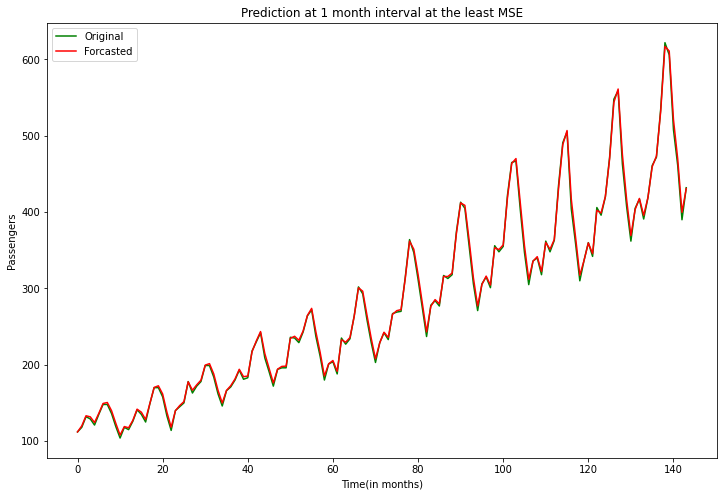

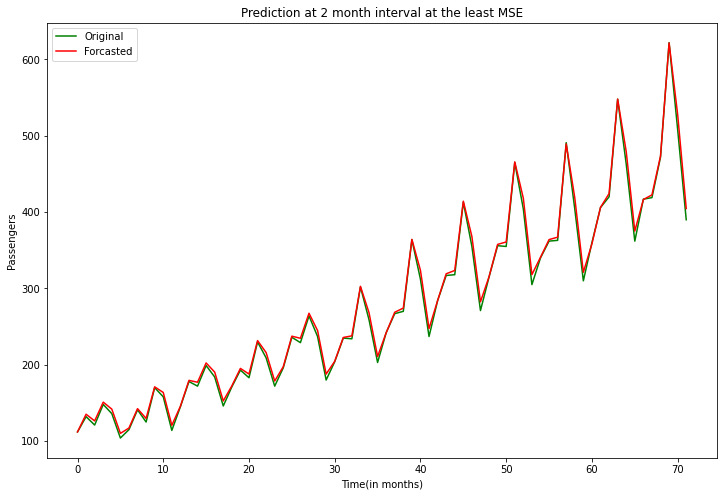

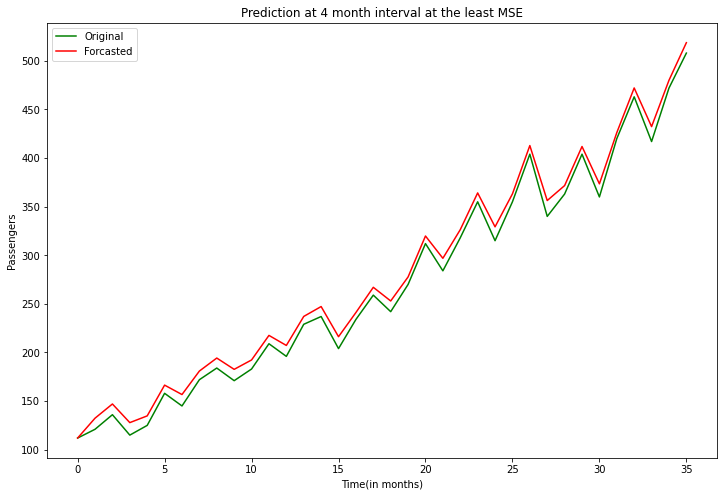

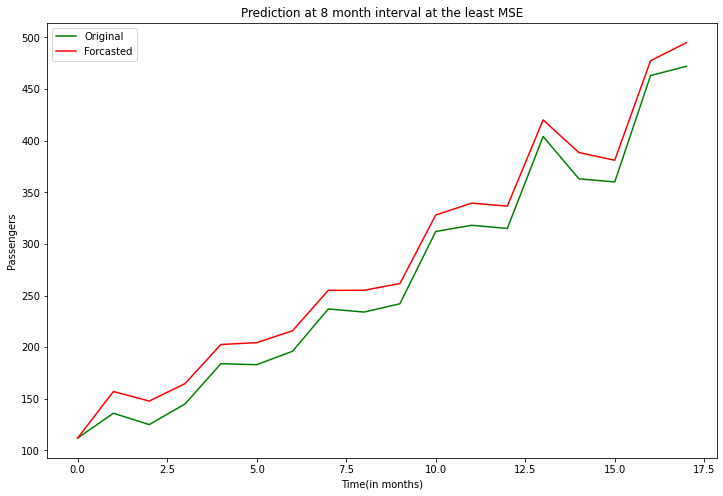

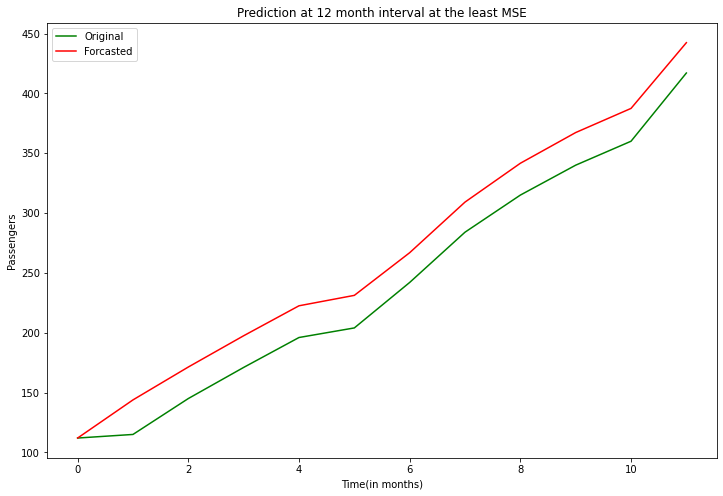

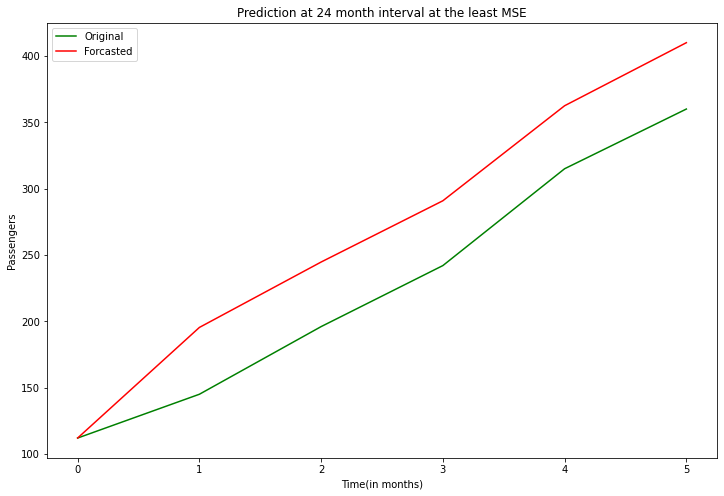

<Figure size 432x288 with 0 Axes>

In [15]:
for fc_idx in range(6):
  plotting_function(final_fc_val_list[fc_idx][min_idx[fc_idx]],dataset_array[fc_idx],time_array[fc_idx],interval_arr[fc_idx])  

**Table of Least MSE value for each interval**

In [16]:
from tabulate import tabulate

tab_array = []
for n in range(6):
  tab = [(interval_arr[n]),final_mse_list[n][min_idx[n]]]
  tab_array.append(tab)

table = tabulate(tab_array, headers=['interval(in hours)', 'Least MSE'], tablefmt='orgtbl')

print(table)

|   interval(in hours) |   Least MSE |
|----------------------+-------------|
|                    1 |     16.7925 |
|                    2 |     46.0829 |
|                    4 |    108.535  |
|                    8 |    409.102  |
|                   12 |    705.947  |
|                   24 |   2409.77   |


**Plotting of MSE at different intervals**

In [17]:

def mse_plotting_func(inter_val,mseval):
  fig = plt.gcf()
  ax = fig.add_axes([0,0,1,1])
  rects = ax.bar(inter_val,round(mseval,2),color='b')
  for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom') 
  fig.set_size_inches(12,8)
  plt.xlabel('Interval(in months)')
  plt.ylabel('MSE')
  plt.title('MSE VS Interval')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


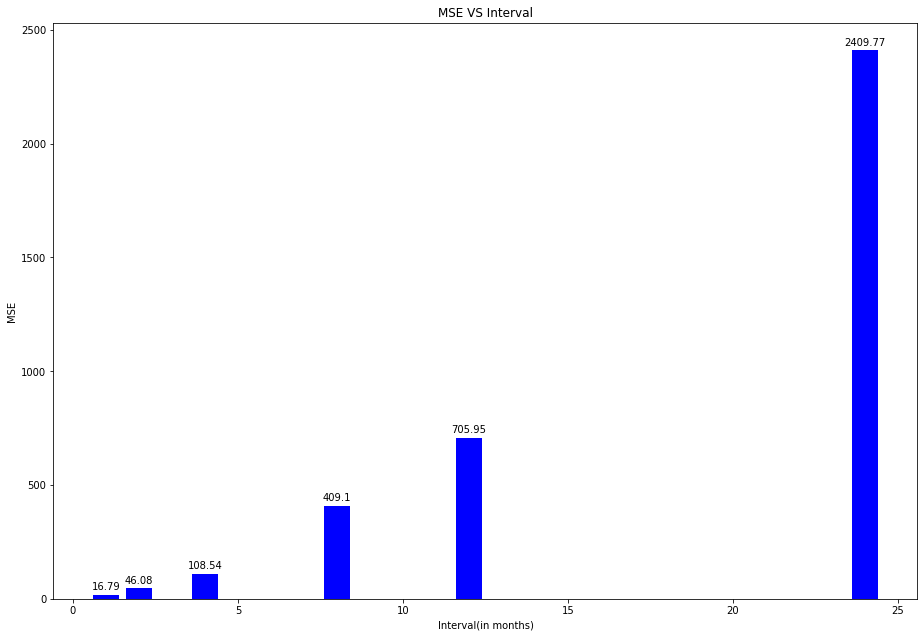

In [18]:
for idx in range(6):
  mse_plotting_func(interval_arr[idx],final_mse_list[idx][min_idx[idx]])

**Comparing forecasted values with inbuilt function**

In [19]:
from sklearn.metrics import mean_squared_error

model = Holt(dataframe['Passengers'])
dataframe['pred_val'] = model.fit(smoothing_level=0.9,smoothing_slope=.01,optimized=False).fittedvalues.shift(0)

MSE = mean_squared_error(dataframe.pred_val.dropna(),dataframe.Passengers)


In [20]:
print('MSE (inbuilt function): ',MSE)
print('MSE (own function): ',final_mse_list[0][min_idx[0]])


MSE (inbuilt function):  1219.2639068827511
MSE (own function):  16.79247719706799


In [22]:
print('Difference in error: ',final_mse_list[0][min_idx[0]]-MSE)

Difference in error:  -1202.4714296856832
